# Prepocessing Dataset Sentimen QRIS TikTok 

SAFARA RISDA AGASTYA 

**LOAD DATA**

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/TUGAS_AKHIR/Dataset_scrapping/dataset.csv")
df.head()

,videoWebUrl,submittedVideoUrl,input,cid,createTime,createTimeISO,full_text,diggCount,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,uid,username,avatarThumbnail,mentions,detailedMentions
0,https://www.tiktok.com/@bank_indonesia/video/7...,https://www.tiktok.com/@bank_indonesia/video/7...,https://www.tiktok.com/@bank_indonesia/video/7...,7.517305e+18,1750258893,2025-06-18T15:01:33.000Z,Dengan PD dan Lantang Tanpa Malu selalu nyebut...,1002,False,False,NaN,71,6568069614960885762,awansetiobudi,https://p16-common-sign-sg.tiktokcdn-us.com/to...,[],[]
1,https://www.tiktok.com/@bank_indonesia/video/7...,https://www.tiktok.com/@bank_indonesia/video/7...,https://www.tiktok.com/@bank_indonesia/video/7...,7.517106e+18,1750212648,2025-06-18T02:10:48.000Z,qris mendunia keren,1013,False,False,NaN,1,7183611279054554138,ramosruiz_,https://p16-common-sign-sg.tiktokcdn-us.com/to...,[],[]
2,https://www.tiktok.com/@bank_indonesia/video/7...,https://www.tiktok.com/@bank_indonesia/video/7...,https://www.tiktok.com/@bank_indonesia/video/7...,7.517480e+18,1750299732,2025-06-19T02:22:12.000Z,menyala BI,224,False,False,NaN,1,6533915841490092033,diteeuuu,https://p16-common-sign-va.tiktokcdn-us.com/to...,[],[]
3,https://www.tiktok.com/@bank_indonesia/video/7...,https://www.tiktok.com/@bank_indonesia/video/7...,https://www.tiktok.com/@bank_indonesia/video/7...,7.518813e+18,1750609964,2025-06-22T16:32:44.000Z,sederhana tapi Donald Trump tak suka 😂😂😂😂,7,False,False,NaN,0,7049923272662172673,hari.tanjung,https://p16-common-sign-useast2a.tiktokcdn-us....,[],[]
4,https://www.tiktok.com/@bank_indonesia/video/7...,https://www.tiktok.com/@bank_indonesia/video/7...,https://www.tiktok.com/@bank_indonesia/video/7...,7.517208e+18,1750236471,2025-06-18T08:47:51.000Z,Semakin bangga dengan produksi Indonesia🇮🇩🤩,118,False,False,NaN,1,6903794452012303362,dorojatumananda,https://p16-common-sign-sg.tiktokcdn-us.com/to...,[],[]


In [6]:
df = df[['username', 'full_text']]
df

,username,full_text
0,awansetiobudi,Dengan PD dan Lantang Tanpa Malu selalu nyebut...
1,ramosruiz_,qris mendunia keren
2,diteeuuu,menyala BI
3,hari.tanjung,sederhana tapi Donald Trump tak suka 😂😂😂😂
4,dorojatumananda,Semakin bangga dengan produksi Indonesia🇮🇩🤩
...,...,...
1557,small00.8,"dikit"" scan\ntau tau bangkrut aja🗿"
1558,user980784263,Padahal ic card jepang lebih mudah & gak ada b...
1559,aillema_16,"di indo aja boros bgt, apalagi di jepang😭😭😭"
1560,sakkarepmu48882,semua orang bisa punya QRIS tapi gak semua ora...


**PREPROCESSING**

**1. Cleaning Data**

In [7]:
df.shape

(1562, 2)

In [8]:
df = df.drop_duplicates(subset=['full_text'])

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

,0
username,0
full_text,0


In [12]:
df.shape

(1510, 2)

In [13]:
import re

def clean_tiktok_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'https?://\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['full_text'] = df['full_text'].apply(clean_tiktok_text)


In [14]:
df['full_text'] = df['full_text'].str.lower()

In [15]:
df

,username,full_text
0,awansetiobudi,dengan pd dan lantang tanpa malu selalu nyebut...
1,ramosruiz_,qris mendunia keren
2,diteeuuu,menyala bi
3,hari.tanjung,sederhana tapi donald trump tak suka
4,dorojatumananda,semakin bangga dengan produksi indonesia
...,...,...
1556,beautyongoing99,kwkw berarti bisa pake gopay dan mbanking
1557,small00.8,dikit scan tau tau bangkrut aja
1558,user980784263,padahal ic card jepang lebih mudah gak ada bia...
1559,aillema_16,di indo aja boros bgt apalagi di jepang


**2. Preprocessing**



*   Normalisasi
*   Stopword
*   Tokenize
*   Stemming







In [18]:
# Normalisasi

norm = {
    " yg ": " yang ",
    " kris ": " qris ",
    " pd ": " percaya diri ",
    " gak ": " tidak ",
    " ga ": " tidak ",
    " klo ": " kalau ",
    " dpt ": " dapat ",
    " tdk ": " tidak ",
    " dlm ": " dalam ",
    " sm ": " sama ",
    " dr ": " dari ",
    " trs ": " terus ",
    " bgt ": " banget ",
    " jd ": " jadi ",
    " tp ": " tapi ",
    " sy ": " saya ",
    " gk ": " tidak ",
    " u/ ": " untuk ",
    " dgn ": " dengan ",
    " msh ": " masih ",
    " skrg ": " sekarang ",
    " bkn ": " bukan ",
    " krn ": " karena ",
    " sj ": " saja ",
    " trus ": " terus ",
    " hrs ": " harus ",
    " blm ": " belum ",
    " indo ": "indonesia",
    " jpg ": " jepang ",
    " cina ": " china "
}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,username,full_text
0,awansetiobudi,dengan percaya diri dan lantang tanpa malu sel...
1,ramosruiz_,qris mendunia keren
2,diteeuuu,menyala bi
3,hari.tanjung,sederhana tapi donald trump tak suka
4,dorojatumananda,semakin bangga dengan produksi indonesia
...,...,...
1556,beautyongoing99,kwkw berarti bisa pake gopay dan mbanking
1557,small00.8,dikit scan tau tau bangkrut aja
1558,user980784263,padahal ic card jepang lebih mudah tidak ada b...
1559,aillema_16,diindonesiaaja boros banget apalagi di jepang


In [19]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [20]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["min", "kak", "kamu", "sya", "saya", "dh", "anjir", "mbak", "mba", "kakak", "sg", "vt", "nih", "ni", "abis", "aja", "iya", "bilang", "bs", "pas", "nya", "si", "anda", "capt", "caption","atau", "info", "ke", "gas", "gapapa", "gpp", "gppa", "masih", "msh", "yang", "dan", "betul", "dari", "mau", "dlm","kami", "thx", "bener", "benar", "ok", "yok", "lg", "lgi", "lagi", "y", "d", "jg", "jga", "juga", "mah", "biar", "mending", "bgt", "banget", "dong", "bang", "krna", "karena" , "hai", "emang", "gitu", "gtu", "gt", "ini", "jd", "jadi", "jdi", "gw", "gue", "cuman", "cuma", "cm", "aku", "kalian", "sih", "apa", "bikin", "buat", "atas", "kok", "betul", "klo", "kalo", "toko", "org", "orang", "memang", "byk", "banyak", "padahal", "deh", "udah", "udh", "dah", "kayak", "beberapa","terus", "trus", "trs", "malah", "kalian","tetep", "tahun", "yaa", "wkwk", "xixi", "tp", "tpi", "tapi", "tuh", "gimana", "gmna", "itu","yuk", "plis", "please", "kpn", "kapan"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head(70)


,username,full_text
0,awansetiobudi,percaya diri lantang malu selalu nyebut qris q...
1,ramosruiz_,qris mendunia keren
2,diteeuuu,menyala bi
3,hari.tanjung,sederhana donald trump tak suka
4,dorojatumananda,semakin bangga produksi indonesia
...,...,...
65,jingga_d,ditunggu taiwan
66,anikanikaa,tambah korea tq
67,yulierahmayanti,hongkong taiwan termasuk ya
68,reviewmajo,mendunia


In [21]:
# Tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[percaya, diri, lantang, malu, selalu, nyebut,..."
1,"[qris, mendunia, keren]"
2,"[menyala, bi]"
3,"[sederhana, donald, trump, tak, suka]"
4,"[semakin, bangga, produksi, indonesia]"
...,...
1556,"[kwkw, berarti, pake, gopay, mbanking]"
1557,"[dikit, scan, tau, tau, bangkrut]"
1558,"[ic, card, jepang, lebih, mudah, ada, biaya, a..."
1559,"[diindonesiaaja, boros, apalagi, jepang]"


In [22]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/drive/MyDrive/TUGAS_AKHIR/Dataset_scrapping/Preprocessing/hasil_preprocessing.csv", index=False)
data = pd.read_csv("/content/drive/MyDrive/TUGAS_AKHIR/Dataset_scrapping/Preprocessing/hasil_preprocessing.csv", encoding='latin1')

percaya diri lantang malu selalu nyebut qris qris outlet minimarket resto mana dibenerin kasir kyuris tetep kris
qris dunia keren
nyala bi
sederhana donald trump tak suka
makin bangga produksi indonesia
majubtrus indonesia produk negeri gaeeesss
pliiiz tambah arab saudi biar umroh transaksi pake qris
bangga
jangan pernah tunduk amerika tunduk lah allah
taiwan banget pmi tolong tambah
next korsel plisss yokk
tahan qris pokok keren pokok
minimal asean dulu abisin
kemarin thailand nyoba smua bisa tapi langkah bagus lah mudah
waktu malaysia selalu bayar pak qris kurs juga tinggi nukar uang kertas mantap sih
qris produk indonesia min
sejak qrisnga lg uang cash dompet
arti mata uang langsung ganti sendiri di negara kita pake qris semua layan qris bisa masuk ewallet baru bank tentu
coba sg sama nang semua kalau sg bisa ada sama nets kalau nang ketemu sama bisa
kemarin coba bayar pakai qris malaysia gagal padahal transaksi internasional aktif
bangga bgdkereeen
yawla 2025 aja debat kriskyuris
b

In [23]:
# Hapus baris yang NaN di kolom full_text
df = df.dropna(subset=['full_text'])

# Hapus baris yang full_text kosong atau hanya spasi
df = df[df['full_text'].str.strip() != ""]

df = df.reset_index(drop=True)

print("Jumlah data setelah preprocessing:", len(df))

df.to_csv("/content/drive/MyDrive/TUGAS_AKHIR/Dataset_scrapping/Preprocessing/hasil_preprocessing.csv", index=False)

data = pd.read_csv("/content/drive/MyDrive/TUGAS_AKHIR/Dataset_scrapping/Preprocessing/hasil_preprocessing.csv", encoding='latin1')

print("Jumlah data setelah dibaca ulang:", len(data))
print(data.head())

Jumlah data setelah preprocessing: 1429
Jumlah data setelah dibaca ulang: 1429
          username                                          full_text
0    awansetiobudi  percaya diri lantang malu selalu nyebut qris q...
1       ramosruiz_                                qris mendunia keren
2         diteeuuu                                         menyala bi
3     hari.tanjung                    sederhana donald trump tak suka
4  dorojatumananda                  semakin bangga produksi indonesia


**3. Translate**

In [24]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=4e4ab6825e1b4f5335990b064f12fb9634331cb635dd5b3024b41c9531b61f5c
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [25]:
import pandas as pd
from googletrans import Translator
import time

df = pd.read_csv("/content/drive/MyDrive/TUGAS_AKHIR/Dataset_scrapping/Preprocessing/hasil_preprocessing.csv", encoding='latin1')

# Inisialisasi objek Translator
translator = Translator()

def translate_text(text):
    try:
        # Menerjemahkan teks ke bahasa Inggris dan mengembalikan dalam huruf kecil
        return translator.translate(text, src='id', dest='en').text.lower()
    except Exception as e:
        print(f"Error translating text: {e}")
        return text.lower() if isinstance(text, str) else ''

# Menerjemahkan teks dalam batch
batch_size = 100
for start in range(0, len(df), batch_size):
    end = min(start + batch_size, len(df))
    print(f"Translating rows {start + 1} to {end}...")

    df.loc[start:end-1, 'translated_text'] = df.loc[start:end-1, 'full_text'].apply(translate_text)

    df.to_csv("/content/drive/MyDrive/TUGAS_AKHIR/Dataset_scrapping/Preprocessing/hasil_translated.csv", index=False)

    # Memberikan jeda untuk menghindari batasan API
    time.sleep(60)

print(f"Jumlah data yang telah diterjemahkan: {len(df)}")

Translating rows 1 to 100...
Translating rows 101 to 200...
Translating rows 201 to 300...
Translating rows 301 to 400...
Translating rows 401 to 500...
Translating rows 501 to 600...
Translating rows 601 to 700...
Translating rows 701 to 800...
Translating rows 801 to 900...
Translating rows 901 to 1000...
Translating rows 1001 to 1100...
Error translating text: the JSON object must be str, bytes or bytearray, not NoneType
Translating rows 1101 to 1200...
Translating rows 1201 to 1300...
Translating rows 1301 to 1400...
Translating rows 1401 to 1429...
Jumlah data yang telah diterjemahkan: 1429


**4. Labeling**

In [27]:
data = pd.read_csv("/content/drive/MyDrive/TUGAS_AKHIR/Dataset_scrapping/Preprocessing/hasil_translated.csv", index_col=0)
data

,full_text,translated_text
username,,
awansetiobudi,percaya diri lantang malu selalu nyebut qris q...,"confidence loudly, i always call the qris qris..."
ramosruiz_,qris mendunia keren,qris worldwide cool
diteeuuu,menyala bi,light bi
hari.tanjung,sederhana donald trump tak suka,simple donald trump doesn't like it
dorojatumananda,semakin bangga produksi indonesia,increasingly proud of indonesia's production
...,...,...
beautyongoing99,kwkw berarti pake gopay mbanking,kwkw means using gopay mbanking
small00.8,dikit scan tau tau bangkrut,a little scan know to be bankrupt
user980784263,ic card jepang lebih mudah ada biaya admin bua...,japanese ic card is easier for admin fees for ...


In [28]:
!pip install tweet-preprocessor
!pip install textblob
!pip install nltk
!pip install wordcloud

In [37]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
from textblob import TextBlob

data_tweet = list(data['translated_text'])

polaritas = 0
status = []

# Inisialisasi counter
total_positif = 0
total_negatif = 0
total_netral = 0
total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polarity = analysis.sentiment.polarity
    polaritas += polarity

    if polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:')
print(f'Positif = {total_positif}')
print(f'Netral  = {total_netral}')
print(f'Negatif = {total_negatif}')
print(f'\nTotal Data = {total}')


Hasil Analisis Data:
Positif = 399
Netral  = 818
Negatif = 212

Total Data = 1429


In [39]:
data['sentimen']=status
data

,full_text,translated_text,klasifikasi,sentimen
username,,,,
awansetiobudi,percaya diri lantang malu selalu nyebut qris q...,"confidence loudly, i always call the qris qris...",Positif,Positif
ramosruiz_,qris mendunia keren,qris worldwide cool,Positif,Positif
diteeuuu,menyala bi,light bi,Positif,Positif
hari.tanjung,sederhana donald trump tak suka,simple donald trump doesn't like it,Netral,Netral
dorojatumananda,semakin bangga produksi indonesia,increasingly proud of indonesia's production,Positif,Positif
...,...,...,...,...
beautyongoing99,kwkw berarti pake gopay mbanking,kwkw means using gopay mbanking,Netral,Netral
small00.8,dikit scan tau tau bangkrut,a little scan know to be bankrupt,Negatif,Negatif
user980784263,ic card jepang lebih mudah ada biaya admin bua...,japanese ic card is easier for admin fees for ...,Netral,Netral


In [40]:
import pandas as pd
import os

if 'klasifikasi' in data.columns:
    data = data.drop(columns=['klasifikasi'])

data['sentimen'] = status

output_path = "/content/drive/MyDrive/TUGAS_AKHIR/Dataset_scrapping/Labeling/hasil_labeling.csv"

os.makedirs(os.path.dirname(output_path), exist_ok=True)

data.to_csv(output_path, index=False)

print(f"Hasil labeling berhasil disimpan ke: {output_path}")

Hasil labeling berhasil disimpan ke: /content/drive/MyDrive/TUGAS_AKHIR/Dataset_scrapping/Labeling/hasil_labeling.csv


🌻**20 Kata Paling Sering Muncul**

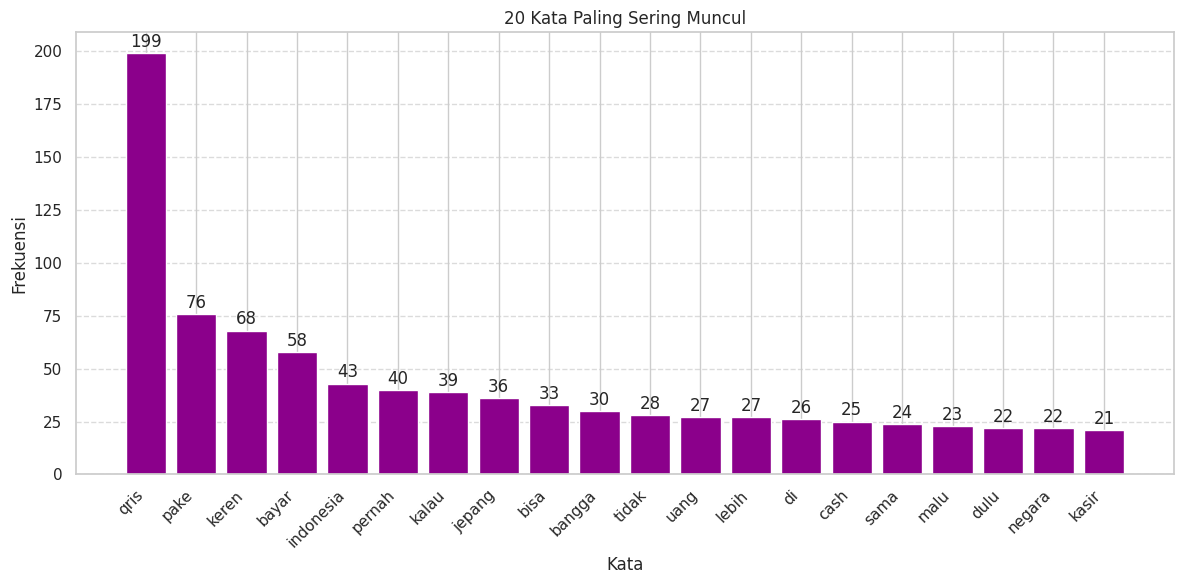

In [148]:
import matplotlib.pyplot as plt

# Ambil 20 kata paling sering
top_words = word_freq.most_common(20)
kata = [w for w, f in top_words]
frekuensi = [f for w, f in top_words]

# Plot bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(kata, frekuensi, color='#8B008B')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('20 Kata Paling Sering Muncul')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, freq in zip(bars, frekuensi):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, str(freq),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

**🌻Distribusi Panjang Komentar**

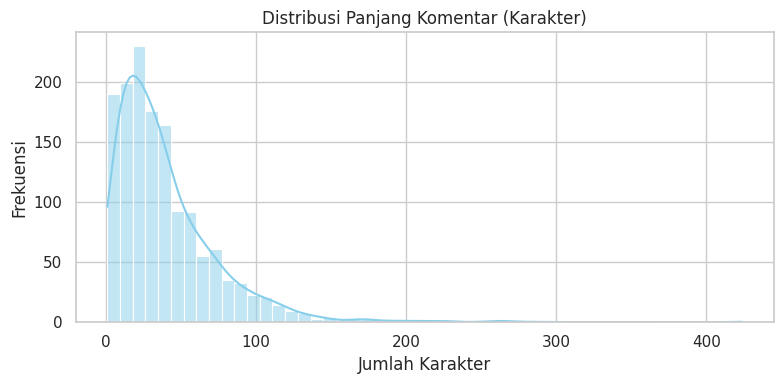

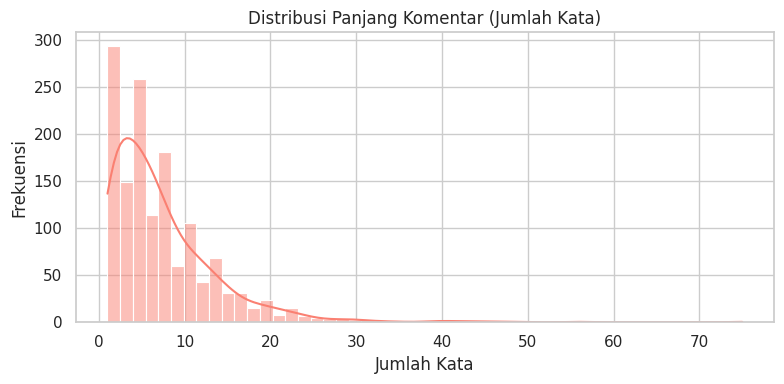

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung panjang tweet dan jumlah kata
df['panjang_karakter'] = df['translated_text'].astype(str).apply(len)
df['jumlah_kata'] = df['translated_text'].astype(str).apply(lambda x: len(x.split()))

# Set gaya seaborn
sns.set(style="whitegrid")

# 1️⃣ Distribusi panjang karakter per tweet
plt.figure(figsize=(8, 4))
sns.histplot(df['panjang_karakter'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Panjang Komentar (Karakter)')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# 2️⃣ Distribusi jumlah kata per tweet
plt.figure(figsize=(8, 4))
sns.histplot(df['jumlah_kata'], bins=50, kde=True, color='salmon')
plt.title('Distribusi Panjang Komentar (Jumlah Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


**🌻WordCloud**

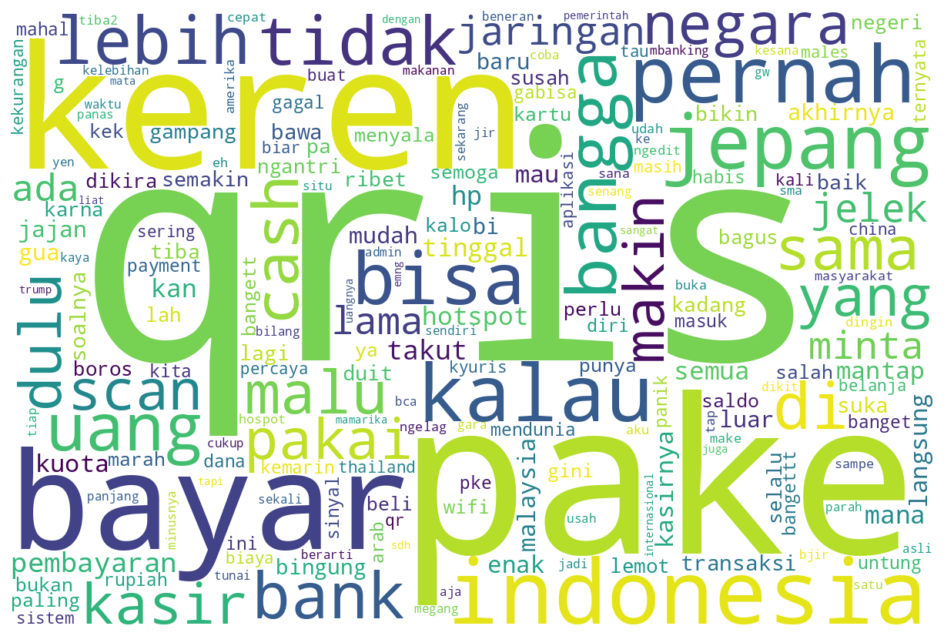

In [151]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# WordCloud dari semua kata
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    colormap='viridis',
    collocations=False
).generate(' '.join(words))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥💥

**PROSES SELANJUTNYA SETELAH PREPROCESSING DAN LABELING**

Menggunakan kolom 'translated_text' (Bahasa Inggris). Labeling yang saya gunakan adalah kolom 'sentimen', karena kolom ini lebih tepat mencerminkan setiap prediksi yang dihasilkan.